# <center> Determination of nitrogen loss from thermal aureoles around NAIP igneous intrusions: supplemental calculations for 'Hydrothermal ammonium from a Large Igneous Province mitigated early Eocene climate change' </center> 
#### <center> Nathan Rochelle-Bates$^1$, Morgan T. Jones$^{2,3}$, Joost Frieling$^{4,5}$, Henrik H. Svensen$^6$, Graeme A. MacGilchrist$^1$, Christian Berndt$^7$, Sverre Planke$^{5,8}$, Eva E. Stüeken$^1$ </center> 
####
1.	University of St Andrews, School of Earth & Environmental Sciences, Bute Building, Queen’s Terrace, St Andrews, Fife, KY16 9TS, United Kingdom
2.	Umeå University, Department of Ecology, Environment and Geoscience, 901 87 Umeå, Sweden
3.	University of Oslo, Departments of Geosciences, Sem Sælands vei 1, 0371 Oslo, Norway
4.	University of Oxford, Department of Earth Sciences, South Parks Rd, Oxford OX1 3AN, United Kingdom
5.	Ghent University, Department of Geology, Ghent, Krijgslaan 297, 9000, Belgium 
6.	University of Oslo, The Njord Centre, departments of Geosciences and Physics, Sem Sælands vei 1, 0371 Oslo, Norway
7.	GEOMAR Helmholtz Centre for Ocean Research Kiel, Kiel, Germany
8.	Volcanic Basin Energy Research AS, Blindernveien 5, 0361 Oslo, Norway

In [24]:
# Load Packages

import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import pandas as pd

rng = np.random.default_rng()

In [25]:
# Import LIPburp outputs (10 sims for each mantle flux (q) value)

dataframe=np.empty((10,5000,17)) #  q = 4
dataframe_jones=np.empty((10,3000,17)) # 10x Jones at al., 2019 sims for comparison
q_8_dataframe = np.empty((10,5000,17))
q_6_dataframe = np.empty((10,5000,17))
q_2_4_dataframe = np.empty((10,8000,17))
q_1_6_dataframe = np.empty((10,11000,17))
    

for i in range (10):
    dataframe[i,:]=pd.read_csv(('results_q4/emissions.model.'+ str(i+1)), delimiter=' ',header=None)

for i in range (10):
    dataframe_jones[i,:]=pd.read_csv(('jones_results_q4/emissions_model_100yr_q4.'+ str(i+1)), delimiter=' ',header=None)

for i in range (10):
    q_6_dataframe[i,:]=pd.read_csv(('results_q6/emissions.model.'+ str(i+1)), delimiter=' ',header=None)    

for i in range (10):
    q_8_dataframe[i,:]=pd.read_csv(('results_q8/emissions.model.'+ str(i+1)), delimiter=' ',header=None)    

for i in range (10):
    q_2_4_dataframe[i,:]=pd.read_csv(('results_q2.4/emissions.model.'+ str(i+1)), delimiter=' ',header=None)    

for i in range (10):
    q_1_6_dataframe[i,:]=pd.read_csv(('results_q1.6/emissions.model.'+ str(i+1)), delimiter=' ',header=None)      
    
#print(dataframe[5,0,0])

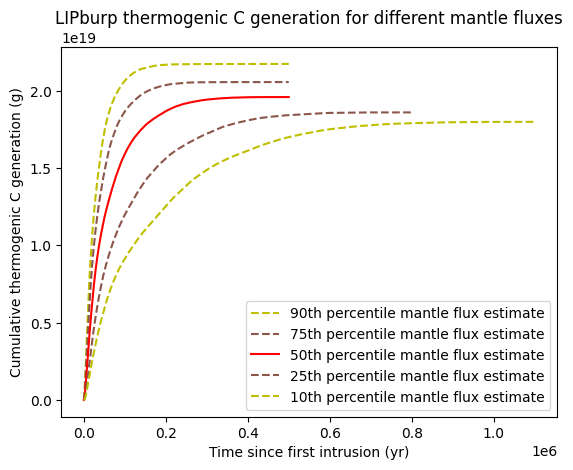

In [26]:
# Check that the LIPburp results have converged, as the maximum cumulative release value is used to scale the results from the aureole model
# LIPburp output is in Pg C

plt.xlabel('Time since first intrusion (yr)')
plt.ylabel('Cumulative thermogenic C generation (g)')
plt.title('LIPburp thermogenic C generation for different mantle fluxes')

plt.plot(q_8_dataframe[0,:,0],np.average(q_8_dataframe[:,:,7],axis=0)*1e15,'--',color='y',label='90th percentile mantle flux estimate')
plt.plot(q_6_dataframe[0,:,0],np.average(q_6_dataframe[:,:,7],axis=0)*1e15,'--',color='tab:brown',label='75th percentile mantle flux estimate')
plt.plot(dataframe[0,:,0],np.average(dataframe[:,:,7],axis=0)*1e15,'-',color='r',label='50th percentile mantle flux estimate')
plt.plot(q_2_4_dataframe[0,:,0],np.average(q_2_4_dataframe[:,:,7],axis=0)*1e15,'--',color='tab:brown', label='25th percentile mantle flux estimate')
plt.plot(q_1_6_dataframe[0,:,0],np.average(q_1_6_dataframe[:,:,7],axis=0)*1e15,'--',color='y', label='10th percentile mantle flux estimate')

plt.legend()


Text(0.5, 1.0, 'Raw LIPburp results at median mantle area flux (Q=4)')

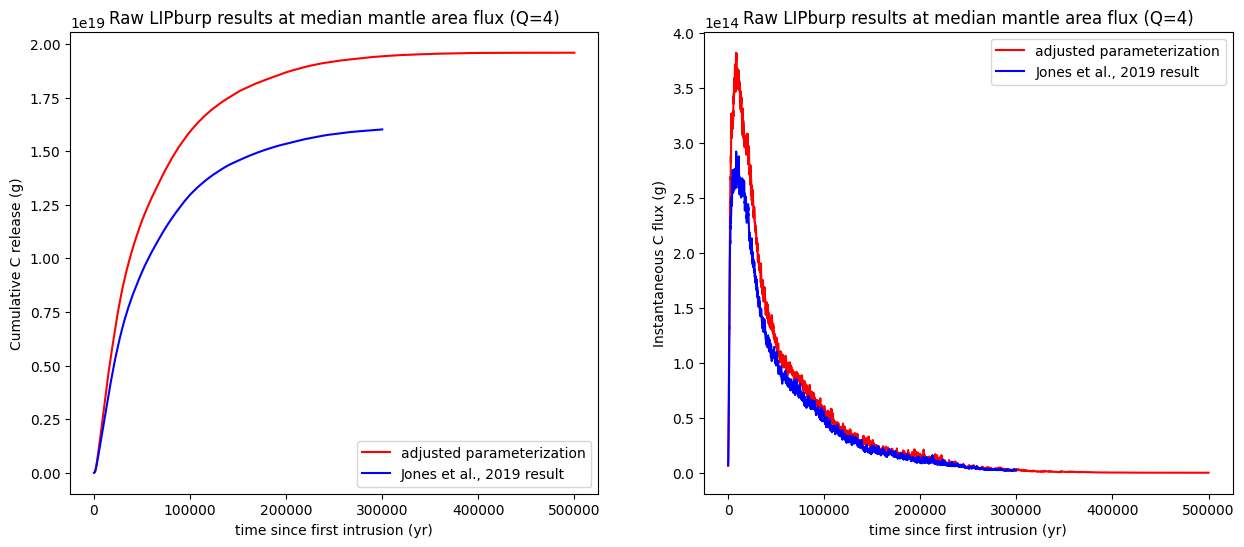

In [27]:
# compare Jones et al., 2019 LIPburp results to the results generated using alternative LIPburp parameterization at median mantle flux (q=4)

fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(15,6))

ax[0].plot(dataframe[0,:,0],np.average(dataframe[:,:,7],axis=0)*1e15,'-',color='r',label='adjusted parameterization')
ax[0].plot(dataframe_jones[0,:,0],np.average(dataframe_jones[:,:,7],axis=0)*1e15,'-',color='b',label='Jones et al., 2019 result') # only runs to 300 kyr
ax[0].legend()
ax[0].set_xlabel('time since first intrusion (yr)')
ax[0].legend()
ax[0].set_ylabel('Cumulative C release (g)')
ax[0].set_title('Raw LIPburp results at median mantle area flux (Q=4)')


ax[1].plot(dataframe[0,:,0],np.average(dataframe[:,:,2],axis=0)*1e15,'-',color='r',label='adjusted parameterization')
ax[1].plot(dataframe_jones[0,:,0],np.average(dataframe_jones[:,:,2],axis=0)*1e15,'-',color='b',label='Jones et al., 2019 result') # only runs to 300 kyr
ax[1].set_xlabel('time since first intrusion (yr)')
ax[1].legend()
ax[1].set_ylabel('Instantaneous C flux (g)')
ax[1].set_title('Raw LIPburp results at median mantle area flux (Q=4)')



##  Section 2: Use maximum cumulative release from LIPburp to scale total N release results from vent conduit model (this study)
<hr style="border: solid 3px red">

In [28]:
# additional parameters for correcting the LIPburp outputs

# estimated minimum and maximum fractions of mineral-bound N, based on Karoo aureole data (Svensen et al., 2008)
mineral_high = 0.73 # highest estimated mineral fraction (lost aureole N trapped in minerals)
mineral_low = 0.07 #  lowest estimated mineral fraction (lost aureole N trapped in minerals)
mineral_average = np.average((0.73,0.07))

Paleocene_NC = [0.06785565206487085,0.07314724411445479] # Mimir Paleocene - background (averaged) - this study
Paleocene_NC_average = np.average((0.06785565206487085,0.07314724411445479)) # Mimir Paleocene - background (averaged) - this study
Jur_NC = [0.0302,0.0238,0.0337,0.1107,0.0413,0.0438,0.0253,0.0412,0.0499,0.0426] # Park et al., 2004; Langrock et al., 2003a
UCret_NC = [0.0335,0.0181,0.0440,0.0303] # Arnaboldi et al.,2006; Langrock et al., 2003a; Langrock et al., 2003b
LCret_NC = [0.0288,0.0185,0.0418,0.0516,0.0448,0.0301,0.0376,0.0557,0.0237,0.0267] # Henderson, 1969; Ruvacalba Baroni et al., 2015; Arnaboldi et al., 2004

NC_values=[Paleocene_NC,LCret_NC,UCret_NC,Jur_NC] # combined 


In [29]:
# produce scaling factors to convert LIPburp (aureole) instantaneous flux results and estimate conduit instantaneous flux

# percentile results for total N loss in vent conduit model (g) (this study)

condu_10=  6719337055042589.0 
condu_25= 7379819949313867.0
condu_50= 8236005365782194.0 
condu_75= 9266139314789108.0
condu_90=  1.0369290804584352e16
condu_mean = 8452083193558155.0

# scaling factors produced from the median conduit result (total mass of nitrogen release, corrected for mineral N) and the converged cumulative LIPburp results at different mantle fluxes
# used to scale the LIPburp instantaneous flux results to the total N release from conduits
# note that the conduit model outputs are nitrogen masses corrected for mineral N, so no need convert
q_8_scale = condu_50/np.average(q_8_dataframe[:,-1,7],axis=0)
q_6_scale = condu_50/np.average(q_6_dataframe[:,-1,7],axis=0)
q_4_scale = condu_50/(np.average(dataframe[:,-1,7],axis=0))
q_2_4_scale = condu_50/np.average(q_2_4_dataframe[:,-1,7],axis=0)
q_1_6_scale = condu_50/np.average(q_1_6_dataframe[:,-1,7],axis=0)

# scale percentiles from model to median mantle flux
condu_10_scale = condu_10/np.average(dataframe[:,-1,7],axis=0)
condu_25_scale= condu_25/np.average(dataframe[:,-1,7],axis=0)
condu_50_scale= condu_50/(np.average(dataframe[:,-1,7],axis=0))
condu_75_scale = condu_75/np.average(dataframe[:,-1,7],axis=0)
condu_90_scale = condu_90/np.average(dataframe[:,-1,7],axis=0)

#scale mean result from counduit simulation
condu_mean_scale = condu_mean/(np.average(dataframe[:,-1,7],axis=0))


max instantaneous N flux at median mantle flux (q = 4) = 160523127464.93176 g/yr
averaged N flux (mean result) over 100 kyr = 0.08452083193558155)


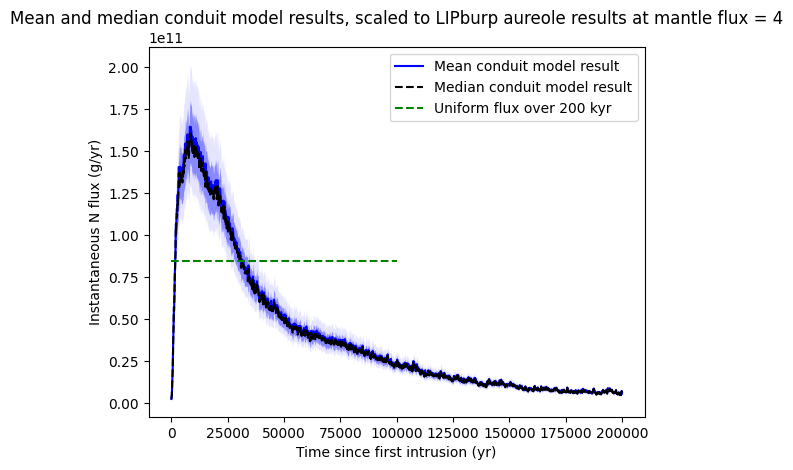

In [30]:
# plot instantaneous flux data from LIPburp, scaled to the total N release from conduits (g)
# gives corresponding nitrogen flux from conduits, assuming that the mass of nitrogen lost from conduits is released over the same timeframe as the aureoles

plt.plot(dataframe[0,:2000,0],np.average(dataframe[:,:2000,2],axis=0)*condu_mean_scale,'-',color='b', label='Mean conduit model result')

plt.plot(dataframe[0,:2000,0],np.average(dataframe[:,:2000,2],axis=0)*condu_50_scale,'--',color='k', label='Median conduit model result')


plt.fill_between(dataframe[0,:2000,0],(np.average(dataframe[:,:2000,2],axis=0)*condu_25_scale),(np.average(dataframe[:,:2000,2],axis=0)*condu_75_scale),color='b',alpha=0.4,linewidth = 0)
plt.fill_between(dataframe[0,:2000,0],(np.average(dataframe[:,:2000,2],axis=0)*condu_10_scale),(np.average(dataframe[:,:2000,2],axis=0)*condu_90_scale),color='b',alpha=0.1,linewidth = 0)

plt.hlines(y=condu_mean/1e5,xmin=0,xmax=100000,color='g',linestyle='--', label = 'Uniform flux over 200 kyr') # median conduit result, averaged over entire PETM duration

plt.xlabel('Time since first intrusion (yr)')
plt.ylabel('Instantaneous N flux (g/yr)')
plt.title('Mean and median conduit model results, scaled to LIPburp aureole results at mantle flux = 4')
plt.legend()
# plt.savefig("Nreleasevent_scaled_q4_mean.pdf",format="pdf") # save the fig

print(f'max instantaneous N flux at median mantle flux (q = 4) = {np.max(np.average(dataframe[:,:,2],axis=0)*q_4_scale)} g/yr')
print(f'averaged N flux (mean result) over 100 kyr = {(condu_mean/1e5)/1e12})')


##  Section 3: Monte Carlo type approach to incorporate variability in mantle flux, N/C ratio and mineral N content
<hr style="border: solid 3px red">

In [31]:
# function to produce random combinations of N/C ratio and mineral N content, based on observations

def NC_conversion_fcn (sims, units, NC_values,mineral_high,mineral_low):
    weighted_unit_values = np.zeros((units,sims))
    for i in range(4):
        sub_units = np.size(NC_values[i])
        NC_combos = rng.dirichlet(alpha=np.ones(sub_units),size=sims) # generates an array of vectors whos components add up to 1
        NC_combos = np.multiply(NC_combos,NC_values[i]) # use vectors to weight the N/C ratios from lithological sub-units
        NC_combos =np.sum(NC_combos, axis = 1) # sum weighted N/C ratios
        weighted_unit_values[i,:]=NC_combos 
    
    unit_NC_combos = rng.dirichlet(alpha=np.ones(units),size=sims) # create an array of vectors whos components add up to 1, for major units
    unit_NC_combos = np.multiply(weighted_unit_values,unit_NC_combos.T) # use vectors to weight the N/C ratios from major lithological units
    NC_combos =np.sum(unit_NC_combos, axis = 0) # sum weighted N/C ratios from major units
    mineral_correction = rng.uniform((1-mineral_high),(1-mineral_low),size=sims) # multiply combined NC ratio by random mineral N content between min and max (uniform distribution)
    correction = mineral_correction*NC_combos
    return correction


In [32]:
# combine randomly resampled model results (at different qs) with random combinations of mineral N and N/C ratio to generate N release results

sims=10000

# timeframe
xs = 2000 # kyr

units = 4 # number of major lithological units with N/C data

# inputs for q interpolation and resampling fcn
percentiles = 0.10,0.25,0.50,0.75,0.90 # percentiles for mantle flux (q): values used for LIPburp input (correspond to q = 1.6,2.4,4,6,8)

# inputs for the mineral and NC combinations fcn
NC_values=[Paleocene_NC_average,LCret_NC,UCret_NC,Jur_NC]

# call fcn for combined mineral and NC correction values
min_NC_correction_vals =  NC_conversion_fcn(sims, units, NC_values,mineral_high,mineral_low)# NC_mineral_correction_fcn(sims,NC_values,mineral_low,mineral_high) # array with random combinaitons of N/C and mineral fraction

# mineral and NC correction array
min_NC_correction_array = np.array(xs*[min_NC_correction_vals]) # repeats the mineral+NC correction values across number of x (time) values, creating 2d array


In [33]:
# average the N release curves from LIPburp (cumulative and instantaneous flux), then apply correction array to each

# average the instantaneous flux results: 10 simulations at 5 different mantle area flux values
q4_flux = np.average(dataframe[:,:xs,2],axis=0)
q2_4_flux = np.average(q_2_4_dataframe[:,:xs,2],axis=0)
q6_flux = np.average(q_6_dataframe[:,:xs,2],axis=0)
q8_flux = np.average(q_8_dataframe[:,:xs,2],axis=0)
q1_6_flux = np.average(q_1_6_dataframe[:,:xs,2],axis=0)

# multiply the averaged flux curves by the correction array
q1_6_array = min_NC_correction_array * (np.array(sims*[q1_6_flux]).T)
q2_4_array = min_NC_correction_array * (np.array(sims*[q2_4_flux]).T)
q4_array = min_NC_correction_array * (np.array(sims*[q4_flux]).T)
q6_array = min_NC_correction_array * (np.array(sims*[q6_flux]).T)
q8_array = min_NC_correction_array * (np.array(sims*[q8_flux]).T)

# find percentile results for each array
q4_array_perc = np.percentile(q4_array,[10,25,50,75,90],axis=1)
q2_4_array_perc = np.percentile(q2_4_array,[10,25,50,75,90],axis=1)
q6_array_perc = np.percentile(q6_array,[10,25,50,75,90],axis=1)
q8_array_perc = np.percentile(q8_array,[10,25,50,75,90],axis=1)
q1_6_array_perc = np.percentile(q1_6_array,[10,25,50,75,90],axis=1)

# find means for each array
q4_array_mean = np.average(q4_array,axis=1)
q2_4_array_mean = np.average(q2_4_array,axis=1)
q6_array_mean = np.average(q6_array,axis=1)
q1_6_array_mean = np.average(q1_6_array,axis=1)
q8_array_mean = np.average(q8_array,axis=1)

# do the same for the cumulative release data
# average the cumulative release results from 10 LIPburp simulations, repeat for different mantle area fluxes
q4_cumu = np.average(dataframe[:,:xs,7],axis=0)
q2_4_cumu = np.average(q_2_4_dataframe[:,:xs,7],axis=0)
q6_cumu = np.average(q_6_dataframe[:,:xs,7],axis=0)
q8_cumu = np.average(q_8_dataframe[:,:xs,7],axis=0)
q1_6_cumu = np.average(q_1_6_dataframe[:,:xs,7],axis=0)

# multiply the averaged cumulative release curves by the correction array
q4_cumu_array = min_NC_correction_array * (np.array(sims*[q4_cumu]).T)
q2_4_cumu_array = min_NC_correction_array * (np.array(sims*[q2_4_cumu]).T)
q6_cumu_array = min_NC_correction_array * (np.array(sims*[q6_cumu]).T)
q1_6_cumu_array = min_NC_correction_array * (np.array(sims*[q1_6_cumu]).T)
q8_cumu_array = min_NC_correction_array * (np.array(sims*[q8_cumu]).T)

# find percentile results for each array
q4_cumu_array_perc = np.percentile(q4_cumu_array,[10,25,50,75,90],axis=1)
q2_4_cumu_array_perc = np.percentile(q2_4_cumu_array,[10,25,50,75,90],axis=1)
q6_cumu_array_perc = np.percentile(q6_cumu_array,[10,25,50,75,90],axis=1)
q1_6_cumu_array_perc = np.percentile(q1_6_cumu_array,[10,25,50,75,90],axis=1)
q8_cumu_array_perc = np.percentile(q8_cumu_array,[10,25,50,75,90],axis=1)

# find means for each array
q4_cumu_array_mean = np.average(q4_cumu_array,axis=1)
q2_4_cumu_array_mean = np.average(q2_4_cumu_array,axis=1)
q6_cumu_array_mean = np.average(q6_cumu_array,axis=1)
q1_6_cumu_array_mean = np.average(q1_6_cumu_array,axis=1)
q8_cumu_array_mean = np.average(q8_cumu_array,axis=1)


maximum flux (ensemble mean):10.429028383838379 Tg/yr
maximum flux (upper and lower quartile):(7.478823523426707, 13.054771397214006) Tg/yr
cumulative 100 kyr (upper and lower quartile):(311.6878710011074, 544.0713890972271) Pg
release at 100 kyr(ensemble mean): 434.64077516824716 Pg
release at 170 kyr(ensemble mean): 496.63097420672364Pg
release at 100 kyr (Q = 2.4)(ensemble mean): 327.13732184457893 Pg
release at 100 kyr (Q = 6)(ensemble mean): 509.7085128252521 Pg
peak flux (Q = 2.4)(ensemble mean): 6.325973860396509 Tg/yr
peak flux (Q = 6)(ensemble mean): 14.496785899587746 Tg/yr


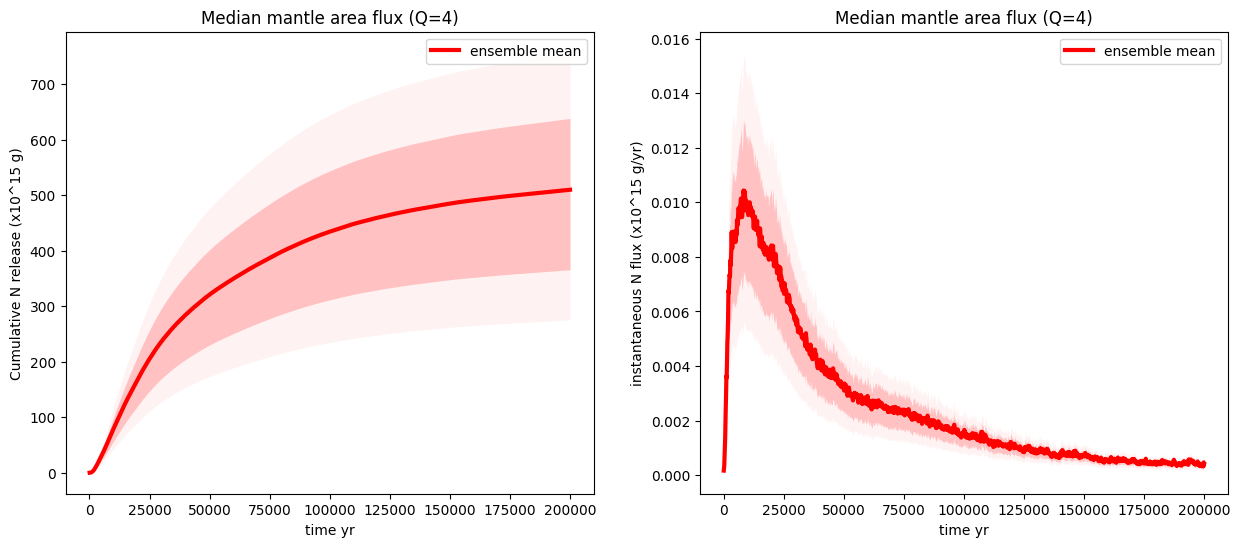

In [34]:
# ensemble mean result of 10 LIPburp runs at median mantle flux (Q=4), propagated with 5000 mineral and NC corrections

fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(15,6))
# cumulative plot
ax[0].plot(dataframe[0,:xs,0],q4_cumu_array_mean, label ='ensemble mean',color = 'r',linewidth = 3)
ax[0].fill_between(dataframe[0,:xs,0],q4_cumu_array_perc[0],q4_cumu_array_perc[4],color='r',alpha=0.05,linewidth = 0)
ax[0].fill_between(dataframe[0,:xs,0],q4_cumu_array_perc[1],q4_cumu_array_perc[3],color='r',alpha=0.2,linewidth = 0)
ax[0].set_xlabel('time since first intrusion (yr)')
ax[0].legend()
ax[0].set_ylabel('Cumulative N release (x10^15 g)')
ax[0].set_title('Median mantle area flux (Q=4)')

# flux plot
ax[1].plot(dataframe[0,:xs,0],q4_array_mean, label ='ensemble mean', color = 'r',linewidth = 3)
ax[1].fill_between(dataframe[0,:xs,0],q4_array_perc[0],q4_array_perc[4],color='r',alpha=0.05, linewidth =0)
ax[1].fill_between(dataframe[0,:xs,0],q4_array_perc[1],q4_array_perc[3],color='r',alpha=0.2,linewidth = 0)
ax[1].set_xlabel('time since first intrusion (yr)')
ax[1].legend()
ax[1].set_ylabel('instantaneous N flux (x10^15 g/yr)')
ax[1].set_title('Median mantle area flux (Q=4)')

print(f'maximum flux (ensemble mean):{np.max(q4_array_mean*1e3)} Tg/yr')
print(f'maximum flux (upper and lower quartile):{np.max(q4_array_perc[1]*1e3),np.max(q4_array_perc[3]*1e3)} Tg/yr')
print(f'cumulative 100 kyr (upper and lower quartile):{q4_cumu_array_perc[1,1000],q4_cumu_array_perc[3,1000]} Pg')

print(f'release at 100 kyr(ensemble mean): {q4_cumu_array_mean[1000]} Pg')
print(f'release at 170 kyr(ensemble mean): {q4_cumu_array_mean[1700]}Pg')

print(f'release at 100 kyr (Q = 2.4)(ensemble mean): {q2_4_cumu_array_mean[1000]} Pg')
print(f'release at 100 kyr (Q = 6)(ensemble mean): {q6_cumu_array_mean[1000]} Pg')
print(f'peak flux (Q = 2.4)(ensemble mean): {np.max(q2_4_array_mean*1e3)} Tg/yr')
print(f'peak flux (Q = 6)(ensemble mean): {np.max(q6_array_mean*1e3)} Tg/yr')

#save the fig
# plt.savefig("cumu_and_flux.pdf",format="pdf")

(0.0, 0.03)

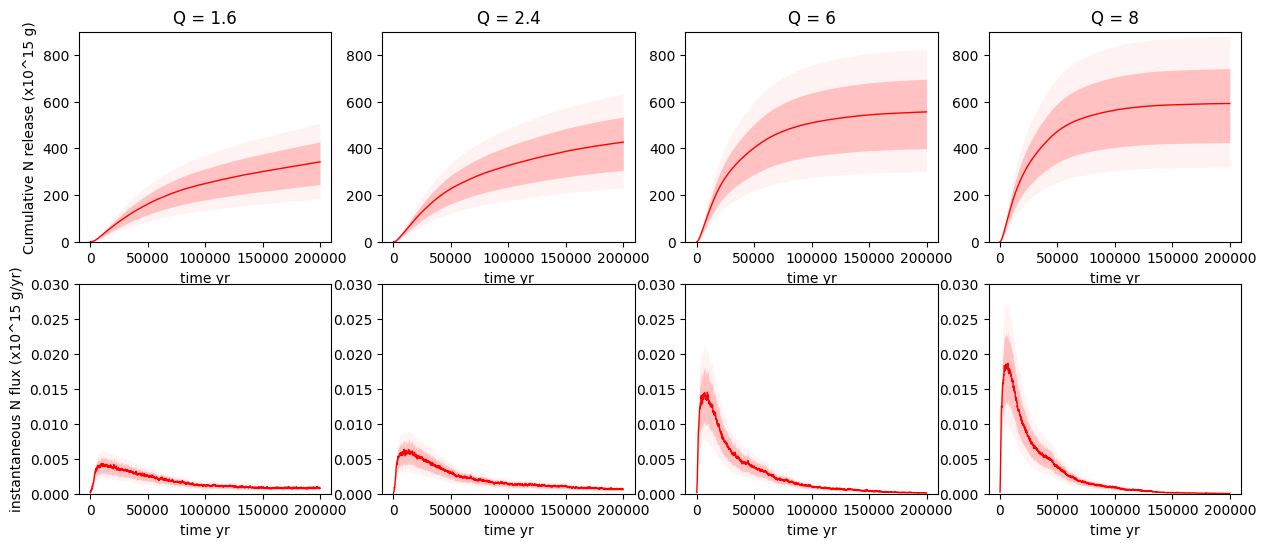

In [35]:
# ensemble mean results for dfferent mantle flux estimates

fig,ax = plt.subplots(nrows=2,ncols=4, figsize=(15,6))

ax[0,0].plot(dataframe[0,:xs,0],q1_6_cumu_array_mean, label ='ensemble mean, Q = 1.6',color = 'r',linewidth = 1)
ax[0,0].fill_between(dataframe[0,:xs,0],q1_6_cumu_array_perc[0],q1_6_cumu_array_perc[4],color='r',alpha=0.05,linewidth = 0)
ax[0,0].fill_between(dataframe[0,:xs,0],q1_6_cumu_array_perc[1],q1_6_cumu_array_perc[3],color='r',alpha=0.2,linewidth = 0)
ax[0,0].set_xlabel('time yr')
ax[0,0].set_ylim(0,900)
ax[0,0].set_ylabel('Cumulative N release (x10^15 g)')
ax[0,0].set_title('Q = 1.6')

ax[0,1].plot(dataframe[0,:xs,0],q2_4_cumu_array_mean, label ='ensemble mean, Q = 2.4',color = 'r',linewidth = 1)
ax[0,1].fill_between(dataframe[0,:xs,0],q2_4_cumu_array_perc[0],q2_4_cumu_array_perc[4],color='r',alpha=0.05,linewidth = 0)
ax[0,1].fill_between(dataframe[0,:xs,0],q2_4_cumu_array_perc[1],q2_4_cumu_array_perc[3],color='r',alpha=0.2,linewidth = 0)
ax[0,1].set_xlabel('time yr')
ax[0,1].set_title('Q = 2.4')
ax[0,1].set_ylim(0,900)

ax[0,2].plot(dataframe[0,:xs,0],q6_cumu_array_mean, label ='ensemble mean, Q = 6',color = 'r',linewidth = 1)
ax[0,2].fill_between(dataframe[0,:xs,0],q6_cumu_array_perc[0],q6_cumu_array_perc[4],color='r',alpha=0.05,linewidth = 0)
ax[0,2].fill_between(dataframe[0,:xs,0],q6_cumu_array_perc[1],q6_cumu_array_perc[3],color='r',alpha=0.2,linewidth = 0)
ax[0,2].set_ylim(0,900)
ax[0,2].set_xlabel('time yr')
ax[0,2].set_title('Q = 6')

ax[0,3].plot(dataframe[0,:xs,0],q8_cumu_array_mean, label ='ensemble mean, Q = 8',color = 'r',linewidth = 1)
ax[0,3].fill_between(dataframe[0,:xs,0],q8_cumu_array_perc[0],q8_cumu_array_perc[4],color='r',alpha=0.05,linewidth = 0)
ax[0,3].fill_between(dataframe[0,:xs,0],q8_cumu_array_perc[1],q8_cumu_array_perc[3],color='r',alpha=0.2,linewidth = 0)
ax[0,3].set_ylim(0,900)
ax[0,3].set_xlabel('time yr')
ax[0,3].set_title('Q = 8')


ax[1,0].plot(dataframe[0,:xs,0],q1_6_array_mean, label ='ensemble mean, Q = 1.6', color = 'r',linewidth = 1)
ax[1,0].fill_between(dataframe[0,:xs,0],q1_6_array_perc[0],q1_6_array_perc[4],color='r',alpha=0.05, linewidth =0)
ax[1,0].fill_between(dataframe[0,:xs,0],q1_6_array_perc[1],q1_6_array_perc[3],color='r',alpha=0.2,linewidth = 0)
ax[1,0].set_xlabel('time yr')
ax[1,0].set_ylabel('instantaneous N flux (x10^15 g/yr)')
ax[1,0].set_ylim(0,0.03)

ax[1,1].plot(dataframe[0,:xs,0],q2_4_array_mean, label ='ensemble mean, Q = 2.4', color = 'r',linewidth = 1)
ax[1,1].fill_between(dataframe[0,:xs,0],q2_4_array_perc[0],q2_4_array_perc[4],color='r',alpha=0.05, linewidth =0)
ax[1,1].fill_between(dataframe[0,:xs,0],q2_4_array_perc[1],q2_4_array_perc[3],color='r',alpha=0.2,linewidth = 0)
ax[1,1].set_xlabel('time yr')
ax[1,1].set_ylim(0,0.03)

ax[1,2].plot(dataframe[0,:xs,0],q6_array_mean, label ='ensemble mean, Q = 6', color = 'r',linewidth = 1)
ax[1,2].fill_between(dataframe[0,:xs,0],q6_array_perc[0],q6_array_perc[4],color='r',alpha=0.05, linewidth =0)
ax[1,2].fill_between(dataframe[0,:xs,0],q6_array_perc[1],q6_array_perc[3],color='r',alpha=0.2,linewidth = 0)
ax[1,2].set_xlabel('time yr')
ax[1,2].set_ylim(0,0.03)

ax[1,3].plot(dataframe[0,:xs,0],q8_array_mean, label ='ensemble mean, Q = 8', color = 'r',linewidth = 1)
ax[1,3].fill_between(dataframe[0,:xs,0],q8_array_perc[0],q8_array_perc[4],color='r',alpha=0.05, linewidth =0)
ax[1,3].fill_between(dataframe[0,:xs,0],q8_array_perc[1],q8_array_perc[3],color='r',alpha=0.2,linewidth = 0)
ax[1,3].set_xlabel('time yr')
ax[1,3].set_ylim(0,0.03)


# save the fig
#plt.savefig("cumu_and_flux_q.pdf",format="pdf")

In [36]:
# values from simulations at median (4), lower quartile (2.4) and upper quartile (6) quartile mantle area flux estimate

print(f'Q = 4 maximum flux:{np.max(q4_array_mean*1e3)} Tg/yr')
print(f'Q = 2.4 maximum flux:{np.max(q2_4_array_mean*1e3)} Tg/yr')
print(f'Q = 6 maximum flux:{np.max(q6_array_mean*1e3)} Tg/yr')

print(f'Q = 4 release at 100 kyr: {q4_cumu_array_mean[1000]} Pg')
print(f'Q = 2.4 release at 100 kyr: {q2_4_cumu_array_mean[1000]} Pg')
print(f'Q = 6 release at 100 kyr: {q6_cumu_array_mean[1000]} Pg')

Q = 4 maximum flux:10.429028383838379 Tg/yr
Q = 2.4 maximum flux:6.325973860396509 Tg/yr
Q = 6 maximum flux:14.496785899587746 Tg/yr
Q = 4 release at 100 kyr: 434.64077516824716 Pg
Q = 2.4 release at 100 kyr: 327.13732184457893 Pg
Q = 6 release at 100 kyr: 509.7085128252521 Pg


##  References
<hr style="border: solid 3px red">

Arnaboldi, M., Meyers, P. A., Tucholke, B., Sibuet, J. C., & Klaus, A. (2006). Data Report: Multi-proxy geochemical characterization of OAE-related black shales at Site 1276, Newfoundland basin. In Proceedings of the Ocean Drilling Program, Scientific Results (Vol. 210, pp. 1-16). College Station TX.

Henderson, G. (1969). Oil and gas prospects in the Cretaceous-Tertiary basin of West Greenland. Rapport Grønlands Geologiske Undersøgelse, 22, 1-63. Langrock, U., Stein, R., Lipinski, M. & Brumsack, H. J. Late Jurassic to Early Cretaceous black shale formation and paleoenvironment in high northern latitudes: Examples from the Norwegian-Greenland Seaway. Paleoceanography 18, (2003).

Jones, S. M., Hoggett, M., Greene, S. E., & Dunkley Jones, T. (2019). Large Igneous Province thermogenic greenhouse gas flux could have initiated Paleocene-Eocene Thermal Maximum climate change. Nature Communications, 10(1), 5547.

Svensen, H., Bebout, G., Kronz, A., Li, L., Planke, S., Chevallier, L., & Jamtveit, B. (2008). Nitrogen geochemistry as a tracer of fluid flow in a hydrothermal vent complex in the Karoo Basin, South Africa. Geochimica et Cosmochimica Acta, 72(20), 4929-4947.

Langrock, U., Stein, R., Lipinski, M., & Brumsack, H. J. (2003a). Late Jurassic to Early Cretaceous black shale formation and paleoenvironment in high northern latitudes: Examples from the Norwegian‐Greenland Seaway. Paleoceanography, 18(3).

Langrock, U., Stein, R., Lipinski, M., & Brumsack, H. J. (2003b). Paleoenvironment and sea-level change in the early Cretaceous Barents Sea—implications from near-shore marine sapropels. Geo-Marine Letters, 23(1), 34-42.

Park, J., Stein, H. J., Hannah, J. L., Georgiev, S. V., Hammer, Ø., & Olaussen, S. (2024). Paleoenvironment in the circum-arctic region from the Middle Jurassic to Early Cretaceous: Trace element and stable isotope geochemistry of the Agardhfjellet Formation, Svalbard. Palaeogeography, Palaeoclimatology, Palaeoecology, 649, 112333.

Ruvalcaba Baroni, I., Van Helmond, N. A. G. M., Tsandev, I., Middelburg, J. J., & Slomp, C. P. (2015). The nitrogen isotope composition of sediments from the proto‐North Atlantic during Oceanic Anoxic Event 2. Paleoceanography, 30(7), 923-937.
